In [27]:
# Import necessary libraries
import numpy as np
import pydicom
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.font_manager as fm
import os
from matplotlib.animation import FuncAnimation, PillowWriter

# Ultrasound images 


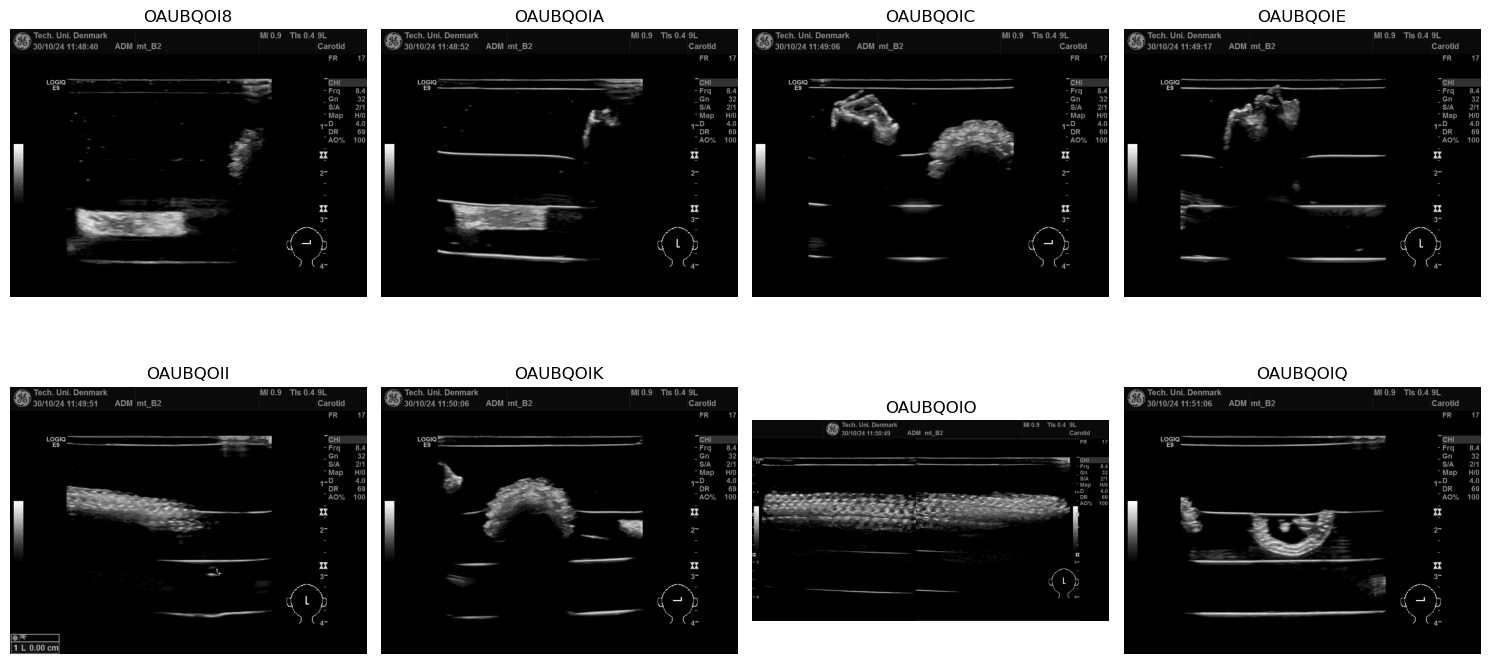

In [64]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np
import os

# Sti til mappen med de otte DICOM-filer
folder_path = '/Users/sofienielsen/Documents/MedicalImaging/students_phantoms/B2__114821_selected'  # Skift til den korrekte sti

# Funktion til at konvertere RGB til gråskala
def rgb_to_grayscale(image):
    R, G, B = image[:, :, 0], image[:, :, 1], image[:, :, 2]
    grayscale_image = 0.2989 * R + 0.5870 * G + 0.1140 * B
    return grayscale_image

# Liste til at gemme billederne og deres filnavne
images = []
filenames = []

# Gennemgå alle filer i mappen og indlæs billederne
for filename in sorted(os.listdir(folder_path)):
    file_path = os.path.join(folder_path, filename)
    try:
        # Indlæs DICOM-filen
        dicom_data = pydicom.dcmread(file_path)
        
        # Hent billeddata og konverter til gråskala, hvis det er RGB
        image = dicom_data.pixel_array
        if image.ndim == 3 and image.shape[2] == 3:  # RGB billede
            image = rgb_to_grayscale(image)
        
        images.append(image)
        filenames.append(filename)  # Gem filnavnet

    except Exception as e:
        print(f"Kunne ikke læse filen {filename}: {e}")

# Vis de otte billeder i en 2x4 figur med filnavnet som titel
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
for i, ax in enumerate(axes.flat):
    if i < len(images):
        ax.imshow(images[i], cmap='gray')
        ax.set_title(filenames[i])  # Sæt filnavnet som titel
    ax.axis('off')
plt.tight_layout()
plt.show()
       

# Object 1

(0.0, 800.0)

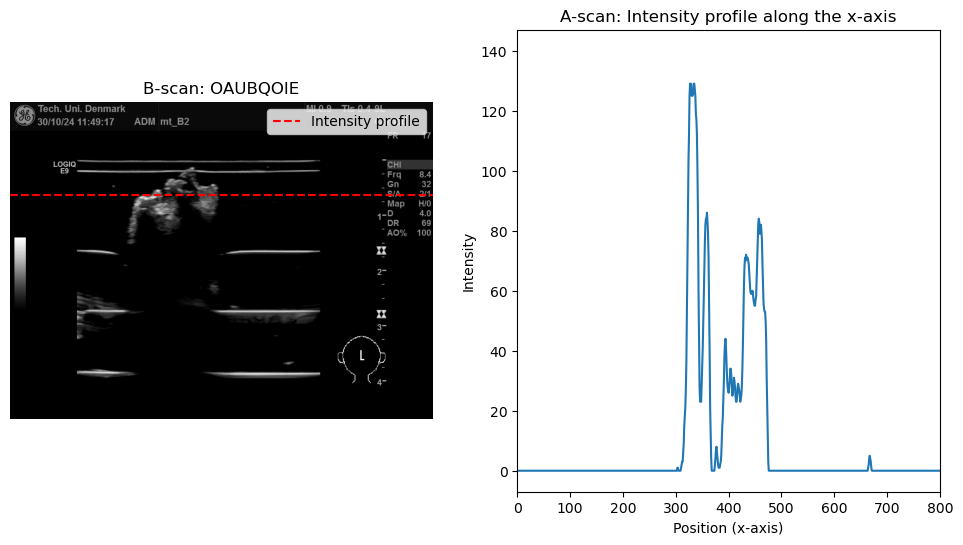

In [567]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np

# Funktion til at konvertere RGB-billede til gråskala
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

# Indlæs DICOM-filen (angiv stien til den fil, du vil bruge)
file_path = '/Users/sofienielsen/Documents/MedicalImaging/students_phantoms/B2__114821_selected/OAUBQOIE'  # Ændr til den rigtige sti
dicom_data = pydicom.dcmread(file_path)
image = dicom_data.pixel_array

# Konverter til gråskala, hvis billedet er RGB
if image.ndim == 3 and image.shape[2] == 3:
    image = rgb2gray(image)

# Vælg en linje langs midten af billedets højde til intensitetsprofilen
midpoint = image.shape[0] // 2 - 150  # Midten af billedets højde
intensity_profile = image[midpoint, :]  # Intensitetsprofil langs midten (vandret linje)

# Plot intensitetsprofilen og det oprindelige billede
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot det oprindelige billede med en vandret markering for intensitetsprofilen
ax1.imshow(image, cmap='gray')
ax1.axhline(midpoint, color='r', linestyle='--', label="Intensity profile")  # Vandret markering langs midten
ax1.set_title("B-scan: OAUBQOIE")
ax1.axis('off')
ax1.legend()

# Plot intensitetsprofilen med dybde langs x-aksen og intensitet langs y-aksen
ax2.plot(range(len(intensity_profile)), intensity_profile)
ax2.set_title("A-scan: Intensity profile along the x-axis")
ax2.set_xlabel("Position (x-axis)")
ax2.set_ylabel("Intensity")
ax2.set_xlim([0, 800])

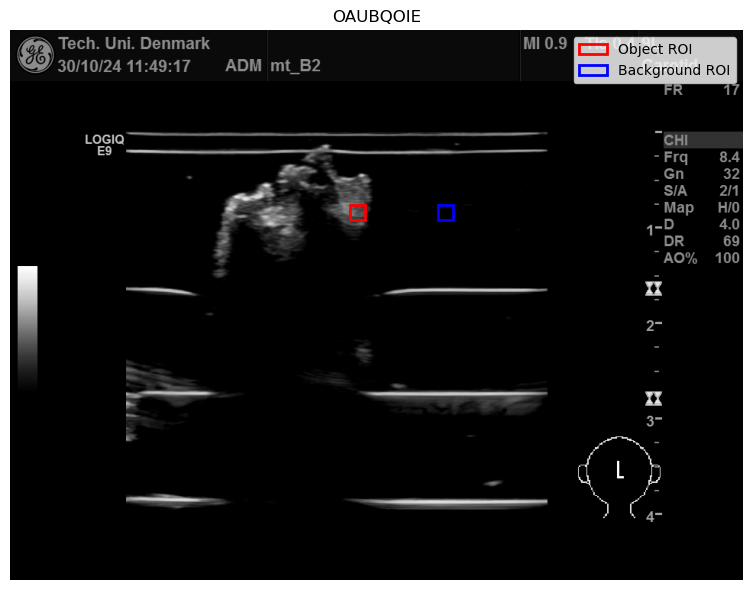

(Signal mean): 74.38
(noise_std): 0.26
Signal-to-Noise Ratio (SNR): 287.39


In [625]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np

# Funktion til at konvertere RGB-billede til gråskala
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

# Indlæs DICOM-filen (tilpasset til den nye fil)
file_path = '/Users/sofienielsen/Documents/MedicalImaging/students_phantoms/B2__114821_selected/OAUBQOIE'  # Ændr til den rigtige sti
dicom_data = pydicom.dcmread(file_path)
image = dicom_data.pixel_array

# Konverter til gråskala, hvis billedet er RGB
if image.ndim == 3 and image.shape[2] == 3:
    image = rgb2gray(image)

# Vælg en dybde (række) lidt længere nede i billedet til ROIs
depth_row = int(image.shape[0] // 2.5 - 50)  # Flyt ROIs en smule længere ned i billedet

# Definer ROIs for objekt og baggrund på samme dybde
# Antag ROI størrelse på 20x20 pixels
object_roi = image[depth_row-10:depth_row+10, image.shape[1]//2-35:image.shape[1]//2-10]  # Objekt-ROI i midten, lidt længere nede
background_roi = image[depth_row-10:depth_row+10, image.shape[1]//2+80:image.shape[1]//2+100]  # Baggrunds-ROI længere til højre og lidt længere nede

# Beregn middel og standardafvigelse for objekt og baggrund
signal_mean = np.mean(object_roi)
noise_std = np.std(background_roi)
snr = signal_mean / noise_std

# Visualiser det fulde billede med ROIs markeret
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Plot det fulde billede med markerede ROIs
ax.imshow(image, cmap='gray')
ax.add_patch(plt.Rectangle((image.shape[1]//2-35, depth_row-10), 20, 20, edgecolor='red', facecolor='none', linewidth=2, label='Object ROI'))
ax.add_patch(plt.Rectangle((image.shape[1]//2+80, depth_row-10), 20, 20, edgecolor='blue', facecolor='none', linewidth=2, label='Background ROI'))  # Flyttet markant længere til højre og lidt længere nede
ax.set_title("OAUBQOIE")
ax.legend()
ax.axis('off')

plt.tight_layout()
plt.show()

# Udskriv SNR
print(f"(Signal mean): {signal_mean:.2f}")
print(f"(noise_std): {noise_std:.2f}")
print(f"Signal-to-Noise Ratio (SNR): {snr:.2f}")

# Object 2

(100.0, 1000.0)

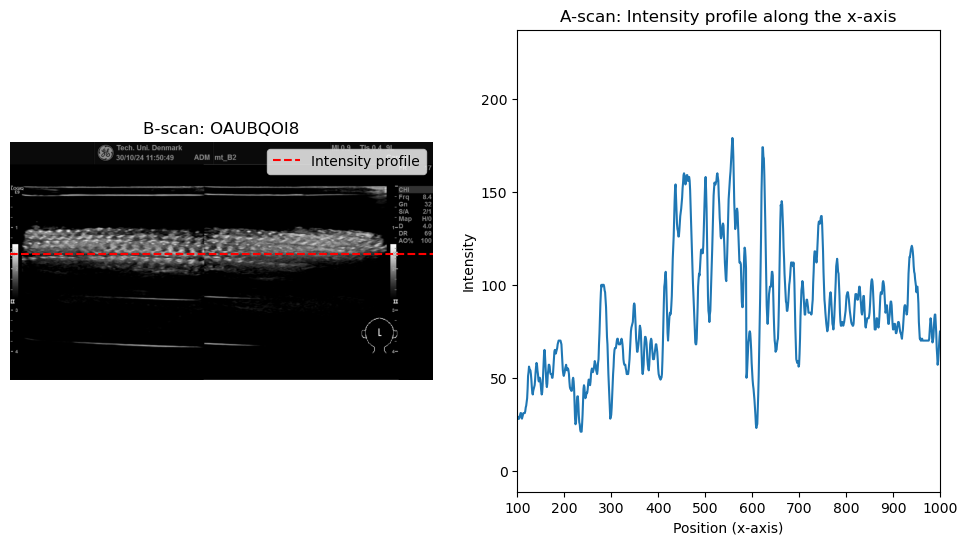

In [626]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np

# Funktion til at konvertere RGB-billede til gråskala
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

# Indlæs DICOM-filen (angiv stien til den fil, du vil bruge)
file_path = '/Users/sofienielsen/Documents/MedicalImaging/students_phantoms/B2__114821_selected/OAUBQOIO'  # Ændr til den rigtige sti
dicom_data = pydicom.dcmread(file_path)
image = dicom_data.pixel_array

# Konverter til gråskala, hvis billedet er RGB
if image.ndim == 3 and image.shape[2] == 3:
    image = rgb2gray(image)

# Vælg en linje langs midten af billedets højde til intensitetsprofilen
midpoint = image.shape[0] // 2-20  # Midten af billedets højde
intensity_profile = image[midpoint, :]  # Intensitetsprofil langs midten (vandret linje)

# Plot intensitetsprofilen og det oprindelige billede
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot det oprindelige billede med en vandret markering for intensitetsprofilen
ax1.imshow(image, cmap='gray')
ax1.axhline(midpoint, color='r', linestyle='--', label="Intensity profile")  # Vandret markering langs midten
ax1.set_title("B-scan: OAUBQOI8")
ax1.axis('off')
ax1.legend()

# Plot intensitetsprofilen med dybde langs x-aksen og intensitet langs y-aksen
ax2.plot(range(len(intensity_profile)), intensity_profile)
ax2.set_title("A-scan: Intensity profile along the x-axis")
ax2.set_xlabel("Position (x-axis)")
ax2.set_ylabel("Intensity")
ax2.set_xlim([100, 1000])

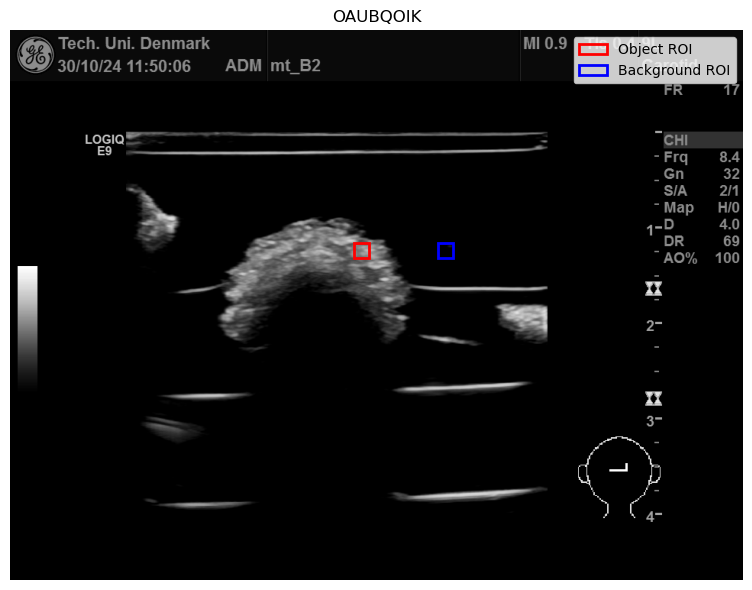

(Signal mean): 131.14
(noise_std): 4.41
Signal-to-Noise Ratio (SNR): 29.72


In [627]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np

# Funktion til at konvertere RGB-billede til gråskala
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

# Indlæs DICOM-filen (tilpasset til den nye fil)
file_path = '/Users/sofienielsen/Documents/MedicalImaging/students_phantoms/B2__114821_selected/OAUBQOIK'  # Ændr til den rigtige sti
dicom_data = pydicom.dcmread(file_path)
image = dicom_data.pixel_array

# Konverter til gråskala, hvis billedet er RGB
if image.ndim == 3 and image.shape[2] == 3:
    image = rgb2gray(image)

# Vælg en dybde (række) lidt længere nede i billedet til ROIs
depth_row = int(image.shape[0] // 2.5)  # Flyt ROIs en smule længere ned i billedet

# Definer ROIs for objekt og baggrund på samme dybde
# Antag ROI størrelse på 20x20 pixels
object_roi = image[depth_row-10:depth_row+10, image.shape[1]//2-30:image.shape[1]//2-10]  # Objekt-ROI i midten, lidt længere nede
background_roi = image[depth_row-10:depth_row+10, image.shape[1]//2+80:image.shape[1]//2+100]  # Baggrunds-ROI længere til højre og lidt længere nede

# Beregn middel og standardafvigelse for objekt og baggrund
signal_mean = np.mean(object_roi)
noise_std = np.std(background_roi)
snr = signal_mean / noise_std

# Visualiser det fulde billede med ROIs markeret
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Plot det fulde billede med markerede ROIs
ax.imshow(image, cmap='gray')
ax.add_patch(plt.Rectangle((image.shape[1]//2-30, depth_row-10), 20, 20, edgecolor='red', facecolor='none', linewidth=2, label='Object ROI'))
ax.add_patch(plt.Rectangle((image.shape[1]//2+80, depth_row-10), 20, 20, edgecolor='blue', facecolor='none', linewidth=2, label='Background ROI'))  # Flyttet markant længere til højre og lidt længere nede
ax.set_title("OAUBQOIK")
ax.legend()
ax.axis('off')

plt.tight_layout()
plt.show()

# Udskriv SNR
print(f"(Signal mean): {signal_mean:.2f}")
print(f"(noise_std): {noise_std:.2f}")
print(f"Signal-to-Noise Ratio (SNR): {snr:.2f}")

# Object 3

(100.0, 800.0)

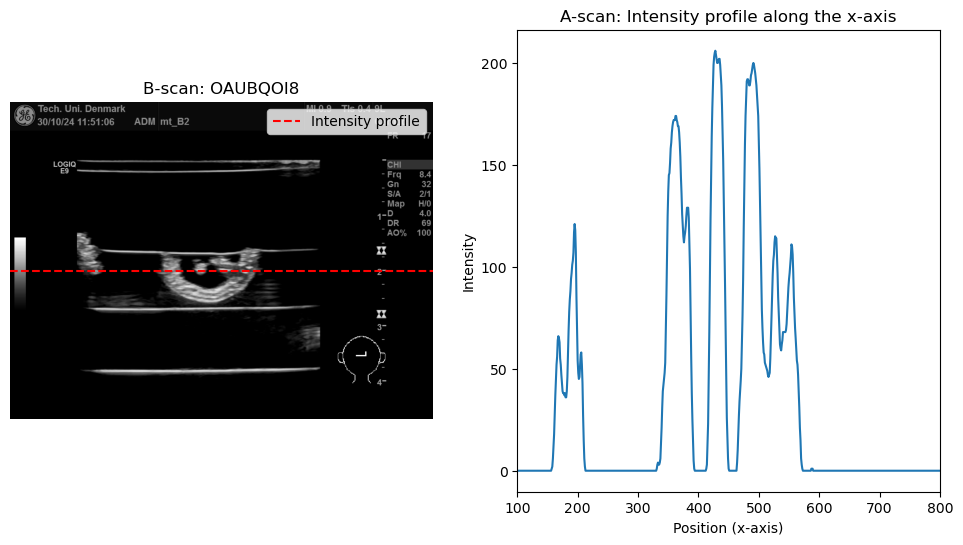

In [628]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np

# Funktion til at konvertere RGB-billede til gråskala
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

# Indlæs DICOM-filen (angiv stien til den fil, du vil bruge)
file_path = '/Users/sofienielsen/Documents/MedicalImaging/students_phantoms/B2__114821_selected/OAUBQOIQ'  # Ændr til den rigtige sti
dicom_data = pydicom.dcmread(file_path)
image = dicom_data.pixel_array

# Konverter til gråskala, hvis billedet er RGB
if image.ndim == 3 and image.shape[2] == 3:
    image = rgb2gray(image)

# Vælg en linje langs midten af billedets højde til intensitetsprofilen
midpoint = image.shape[0] // 2+22  # Midten af billedets højde
intensity_profile = image[midpoint, :]  # Intensitetsprofil langs midten (vandret linje)

# Plot intensitetsprofilen og det oprindelige billede
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot det oprindelige billede med en vandret markering for intensitetsprofilen
ax1.imshow(image, cmap='gray')
ax1.axhline(midpoint, color='r', linestyle='--', label="Intensity profile")  # Vandret markering langs midten
ax1.set_title("B-scan: OAUBQOI8")
ax1.axis('off')
ax1.legend()

# Plot intensitetsprofilen med dybde langs x-aksen og intensitet langs y-aksen
ax2.plot(range(len(intensity_profile)), intensity_profile)
ax2.set_title("A-scan: Intensity profile along the x-axis")
ax2.set_xlabel("Position (x-axis)")
ax2.set_ylabel("Intensity")
ax2.set_xlim([100, 800])

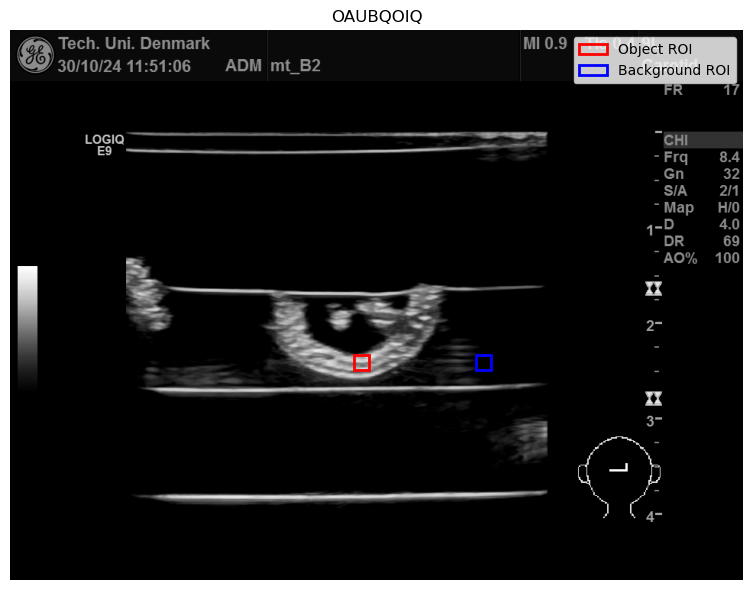

(Signal mean): 171.99
(noise_std): 2.29
Signal-to-Noise Ratio (SNR): 75.25


In [629]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np

# Funktion til at konvertere RGB-billede til gråskala
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

# Indlæs DICOM-filen (tilpasset til den nye fil)
file_path = '/Users/sofienielsen/Documents/MedicalImaging/students_phantoms/B2__114821_selected/OAUBQOIQ'  # Ændr til den rigtige sti
dicom_data = pydicom.dcmread(file_path)
image = dicom_data.pixel_array

# Konverter til gråskala, hvis billedet er RGB
if image.ndim == 3 and image.shape[2] == 3:
    image = rgb2gray(image)

# Vælg en dybde (række) højere oppe i billedet til ROIs
depth_row = image.shape[0] // 2 + 75  # Flyt ROIs højere op i billedet (en tredjedel fra toppen)

# Definer ROIs for objekt og baggrund på samme dybde
# Antag ROI størrelse på 20x20 pixels
object_roi = image[depth_row-10:depth_row+10, image.shape[1]//2-30:image.shape[1]//2-10]  # Objekt-ROI i midten, højere oppe
background_roi = image[depth_row-10:depth_row+10, image.shape[1]//2+130:image.shape[1]//2+150]  # Flyttet længere til højre

# Beregn middel og standardafvigelse for objekt og baggrund
signal_mean = np.mean(object_roi)
noise_std = np.std(background_roi)
snr = signal_mean / noise_std

# Visualiser det fulde billede med ROIs markeret
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Plot det fulde billede med markerede ROIs
ax.imshow(image, cmap='gray')
ax.add_patch(plt.Rectangle((image.shape[1]//2-30, depth_row-10), 20, 20, edgecolor='red', facecolor='none', linewidth=2, label='Object ROI'))
ax.add_patch(plt.Rectangle((image.shape[1]//2+130, depth_row-10), 20, 20, edgecolor='blue', facecolor='none', linewidth=2, label='Background ROI'))  # Flyttet længere til højre
ax.set_title("OAUBQOIQ")
ax.legend()
ax.axis('off')

plt.tight_layout()
plt.show()

# Udskriv SNR
print(f"(Signal mean): {signal_mean:.2f}")
print(f"(noise_std): {noise_std:.2f}")
print(f"Signal-to-Noise Ratio (SNR): {snr:.2f}")

# Object 4

Text(0, 0.5, 'Intensity')

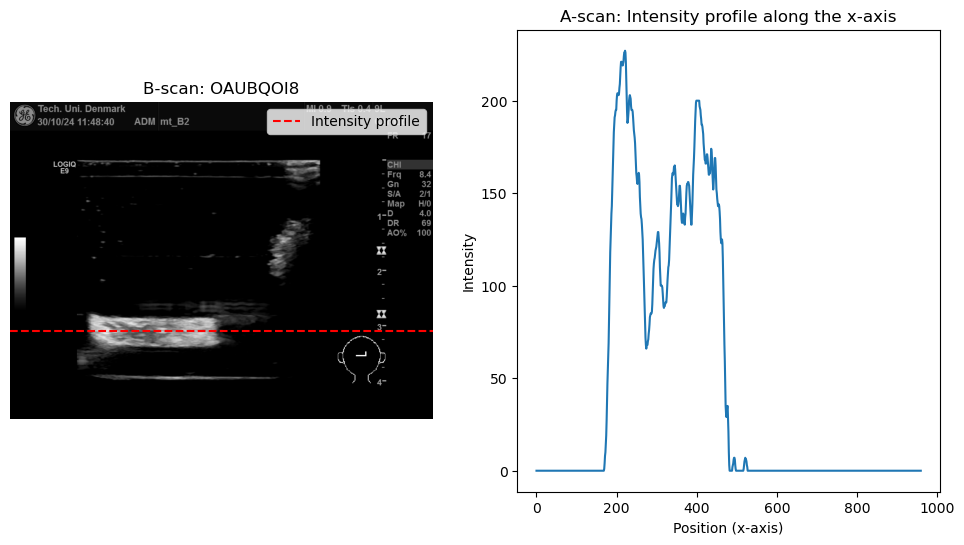

In [630]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np

# Funktion til at konvertere RGB-billede til gråskala
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

# Indlæs DICOM-filen (angiv stien til den fil, du vil bruge)
file_path = '/Users/sofienielsen/Documents/MedicalImaging/students_phantoms/B2__114821_selected/OAUBQOI8'  # Ændr til den rigtige sti
dicom_data = pydicom.dcmread(file_path)
image = dicom_data.pixel_array

# Konverter til gråskala, hvis billedet er RGB
if image.ndim == 3 and image.shape[2] == 3:
    image = rgb2gray(image)

# Vælg en linje langs midten af billedets højde til intensitetsprofilen
midpoint = image.shape[0] // 2 + 160  # Midten af billedets højde
intensity_profile = image[midpoint, :]  # Intensitetsprofil langs midten (vandret linje)

# Plot intensitetsprofilen og det oprindelige billede
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot det oprindelige billede med en vandret markering for intensitetsprofilen
ax1.imshow(image, cmap='gray')
ax1.axhline(midpoint, color='r', linestyle='--', label="Intensity profile")  # Vandret markering langs midten
ax1.set_title("B-scan: OAUBQOI8")
ax1.axis('off')
ax1.legend()

# Plot intensitetsprofilen med dybde langs x-aksen og intensitet langs y-aksen
ax2.plot(range(len(intensity_profile)), intensity_profile)
ax2.set_title("A-scan: Intensity profile along the x-axis")
ax2.set_xlabel("Position (x-axis)")
ax2.set_ylabel("Intensity")


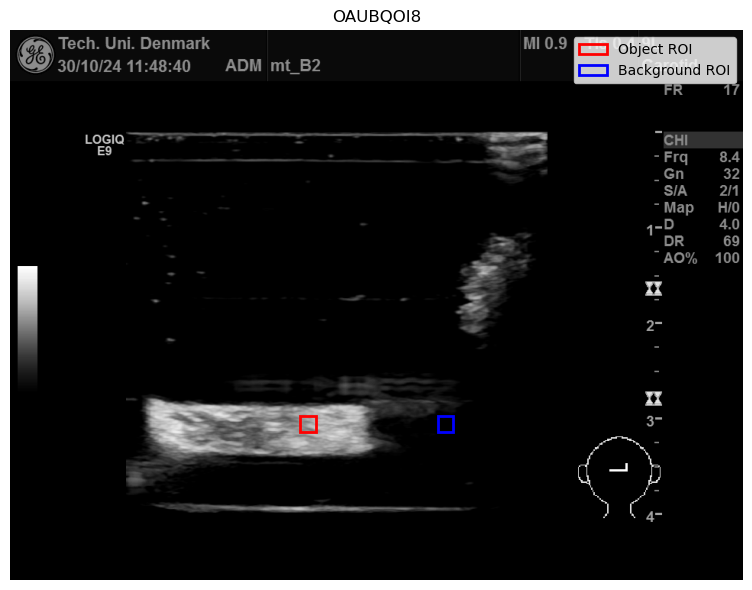

(Signal mean): 170.26
(noise_std): 0.49
Signal-to-Noise Ratio (SNR): 349.94


In [631]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np

# Funktion til at konvertere RGB-billede til gråskala
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

# Indlæs DICOM-filen (tilpasset til den nye fil)
file_path = '/Users/sofienielsen/Documents/MedicalImaging/students_phantoms/B2__114821_selected/OAUBQOI8'  # Ændr til den rigtige sti
dicom_data = pydicom.dcmread(file_path)
image = dicom_data.pixel_array

# Konverter til gråskala, hvis billedet er RGB
if image.ndim == 3 and image.shape[2] == 3:
    image = rgb2gray(image)

# Vælg en dybde (række) højere oppe i billedet til ROIs
depth_row = image.shape[0] // 2 + 155  # Flyt ROIs højere op i billedet (en tredjedel fra toppen)

# Definer ROIs for objekt og baggrund på samme dybde
# Flyt objektet lidt mere til højre
object_roi = image[depth_row-10:depth_row+10, image.shape[1]//2-100:image.shape[1]//2-20]  # Objekt-ROI rykket mere til højre
background_roi = image[depth_row-10:depth_row+10, image.shape[1]//2+80:image.shape[1]//2+100]  # Baggrunds-ROI længere til højre

# Beregn middel og standardafvigelse for objekt og baggrund
signal_mean = np.mean(object_roi)
noise_std = np.std(background_roi)
snr = signal_mean / noise_std

# Visualiser det fulde billede med ROIs markeret
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Plot det fulde billede med markerede ROIs
ax.imshow(image, cmap='gray')
ax.add_patch(plt.Rectangle((image.shape[1]//2-100, depth_row-10), 20, 20, edgecolor='red', facecolor='none', linewidth=2, label='Object ROI'))  # Flyttet lidt mere til højre
ax.add_patch(plt.Rectangle((image.shape[1]//2+80, depth_row-10), 20, 20, edgecolor='blue', facecolor='none', linewidth=2, label='Background ROI'))  # Blå firkant til højre
ax.set_title("OAUBQOI8")
ax.legend()
ax.axis('off')

plt.tight_layout()
plt.show()

# Udskriv SNR
print(f"(Signal mean): {signal_mean:.2f}")
print(f"(noise_std): {noise_std:.2f}")
print(f"Signal-to-Noise Ratio (SNR): {snr:.2f}")